In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('marketing_customer_analysis.csv')

In [4]:

def everything(df):
    # dropping column
    df = df.drop('Unnamed: 0', axis=1)

    # standardizing columns
    cols = []

    for c in df.columns:
        cols.append(c.lower().replace(' ','_'))

    df.columns = cols

    df.rename(columns={'employmentstatus':'employment_status'}, inplace=True)

    # replacing and dropping null values

    df['months_since_last_claim'] = df['months_since_last_claim'].fillna(round(df['months_since_last_claim'].mean()))
    df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(round(df['number_of_open_complaints'].mean()))

    df['state'] = df['state'].fillna('unknown')
    df['response'] = df['response'].fillna('unknown')
    df['vehicle_class'] = df['vehicle_class'].fillna('unknown')
    df['vehicle_size'] = df['vehicle_size'].fillna('unknown')

    df.drop('vehicle_type', axis=1, inplace=True)

    # adding the date column
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
    
    df['month'] = pd.DatetimeIndex(df['effective_to_date']).month

    # returning the final data frame
    return df

In [5]:
# using the function we made to get the cleaned data set

df = everything(df)

# Marketing Customer Analysis Round 3
## EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

## Show DataFrame info.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employment_status              10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

## Describe DataFrame.

In [7]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.140422,48.091934,0.361962,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,9.783582,27.940675,0.890134,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


## Show a plot of the total number of responses.

In [8]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'month'],
      dtype='object')

<AxesSubplot:xlabel='response', ylabel='count'>

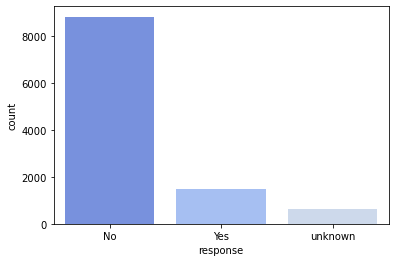

In [9]:
sns.set_palette('coolwarm')
sns.countplot(data=df, x='response')

## Show a plot of the response rate by the sales channel.

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

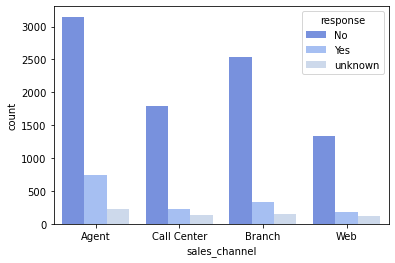

In [10]:
sns.countplot(data=df, x='sales_channel', hue='response')


## Show a plot of the distribution of the Total Claim Amount, broken down by response type. Try a boxplot and distribution plot, for each response type. For the distribution plot, try to plot both kinds of responses in one chart (seaborn's histplot, using the 'hue' parameter is very convenient here).


<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

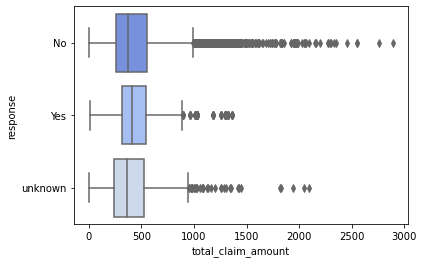

In [11]:
sns.boxplot(data=df, x='total_claim_amount', y='response')

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

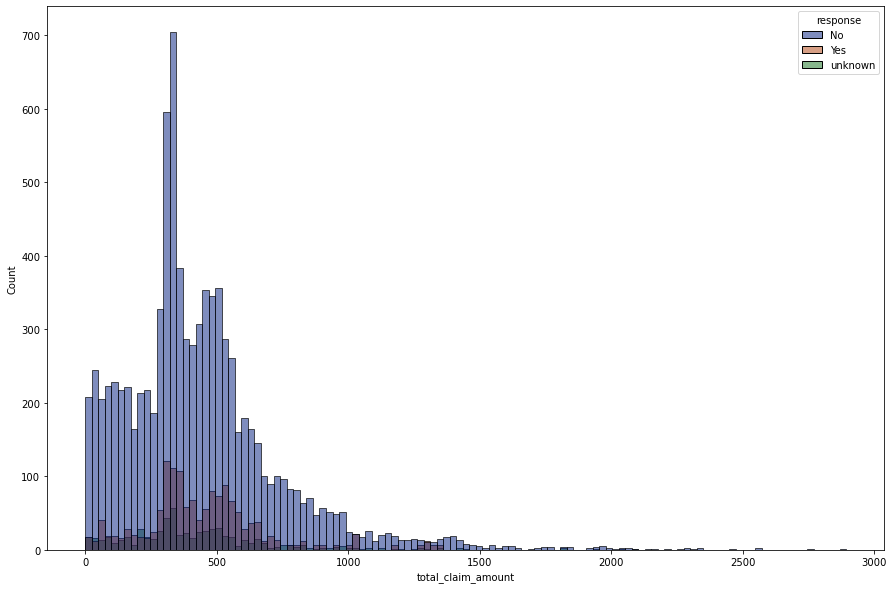

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x='total_claim_amount', hue='response', palette='dark')


## Create similar plots like in the task before, but for Income.


<AxesSubplot:xlabel='income', ylabel='response'>

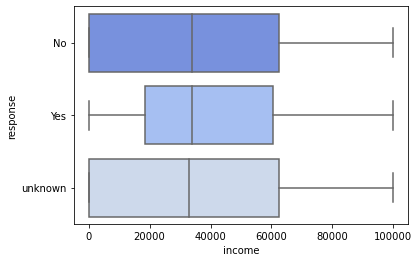

In [13]:
sns.boxplot(data=df, x='income', y='response')

<AxesSubplot:xlabel='income', ylabel='Count'>

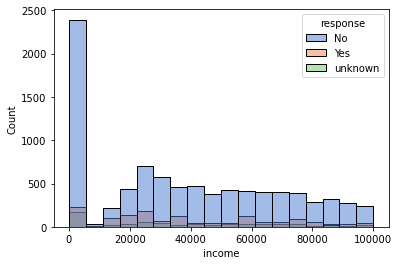

In [14]:
sns.histplot(data=df, x='income', hue='response', palette='muted')


## Create a scatterplot between Total Claim Amount and Income. Play around with the settings of the scatterplot (markersize, alpha level, ...) and in doing so try to identify more features within the data just visually. You can also try different seaborn plots. Check for example this link which explains how to avoid overplotting.


<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

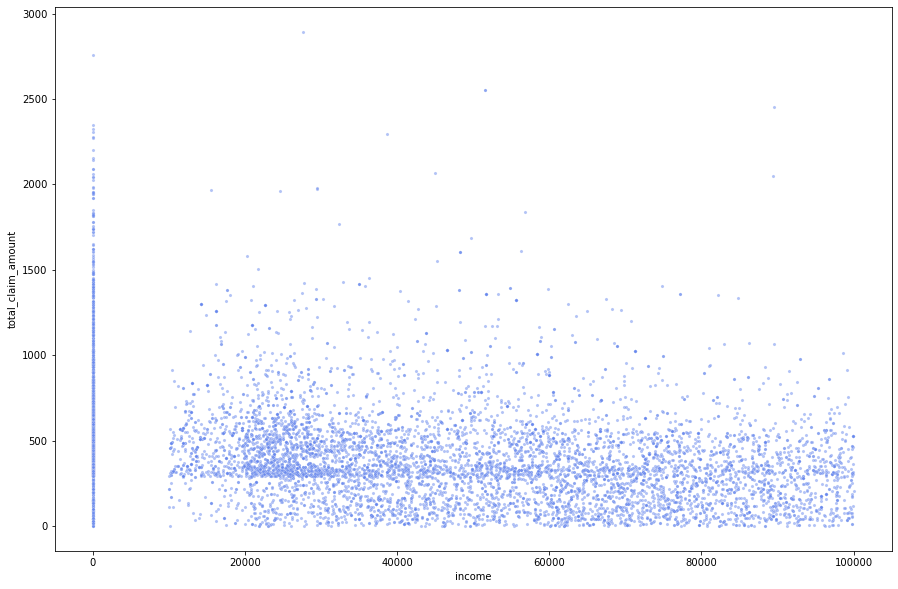

In [38]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='income', y='total_claim_amount', s=10, alpha=0.5)

# Marketing Customer Analysis Round 4

## Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)


In [16]:
df_num = df._get_numeric_data()
df_cat = df.drop(df._get_numeric_data().columns, axis=1)


## Now we will try to check the normality of the numerical variables visually


## - Use seaborn library to construct distribution plots for the numerical variables

In [17]:
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

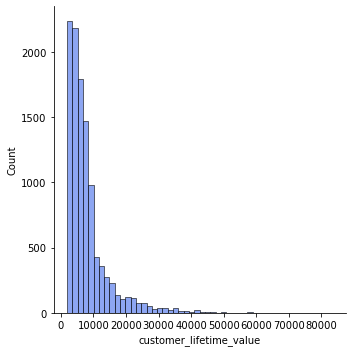

In [18]:
sns.displot(data=df_num, x='customer_lifetime_value', bins=50)

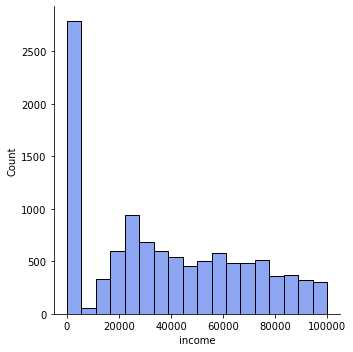

In [19]:
sns.displot(data=df_num, x='income')

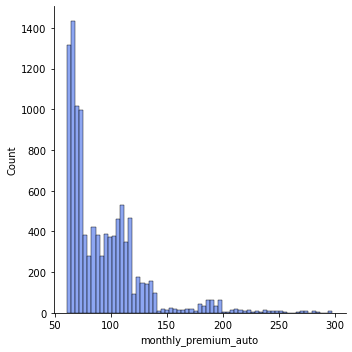

In [20]:
sns.displot(data=df_num, x='monthly_premium_auto')

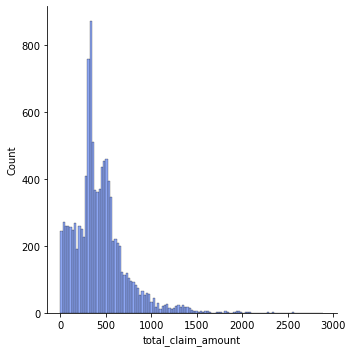

In [21]:
sns.displot(data=df_num, x='total_claim_amount')

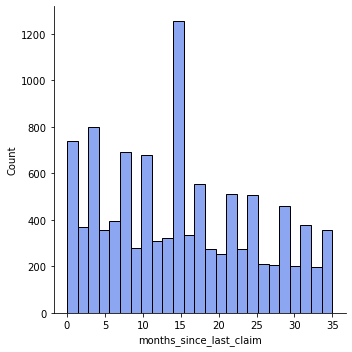

In [22]:
sns.displot(data=df_num, x='months_since_last_claim')

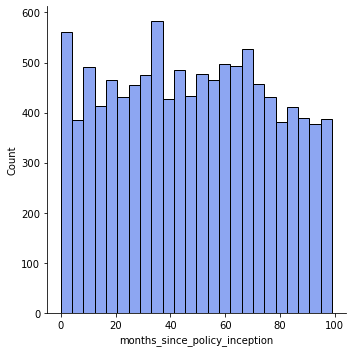

In [23]:
sns.displot(data=df_num, x='months_since_policy_inception')

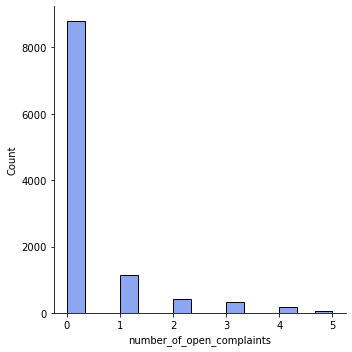

In [24]:
sns.displot(data=df_num, x='number_of_open_complaints')

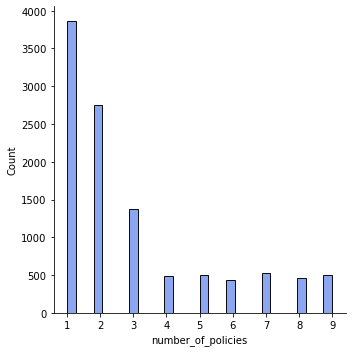

In [25]:
sns.displot(data=df_num, x='number_of_policies')

## - Use Matplotlib to construct histograms

In [26]:
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

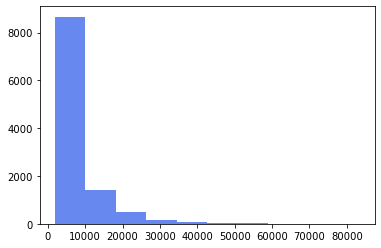

In [27]:
plt.hist(df['customer_lifetime_value'])
plt.show()

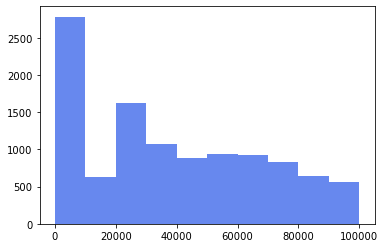

In [28]:
plt.hist(df['income'])
plt.show()

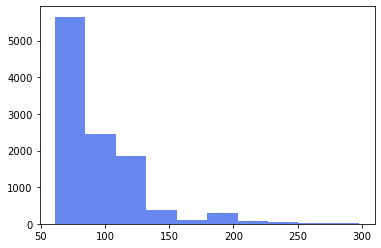

In [29]:
plt.hist(df['monthly_premium_auto'])
plt.show()

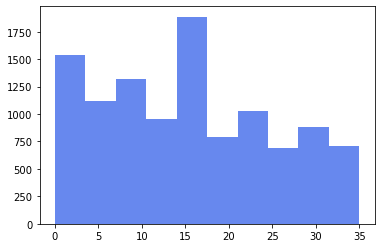

In [30]:
plt.hist(df['months_since_last_claim'])
plt.show()

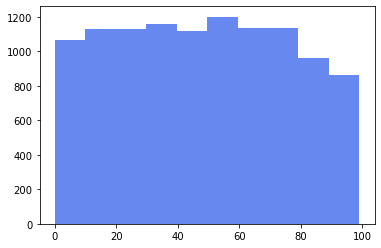

In [31]:
plt.hist(df['months_since_policy_inception'])
plt.show()

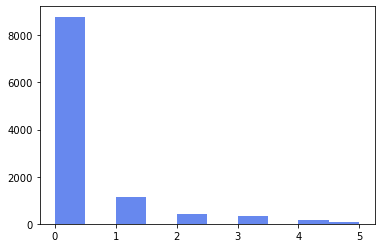

In [32]:
plt.hist(df['number_of_open_complaints'])
plt.show()

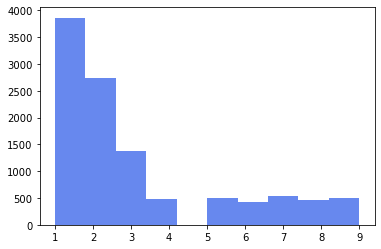

In [33]:
plt.hist(df['number_of_policies'])
plt.show()

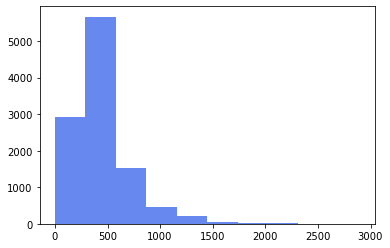

In [34]:
plt.hist(df['total_claim_amount'])
plt.show()

## - Do the distributions for different numerical variables look like a normal distribution?

- total claim amount seems to be the most normally distributed
- the others don't seem to be normally distributed


## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.


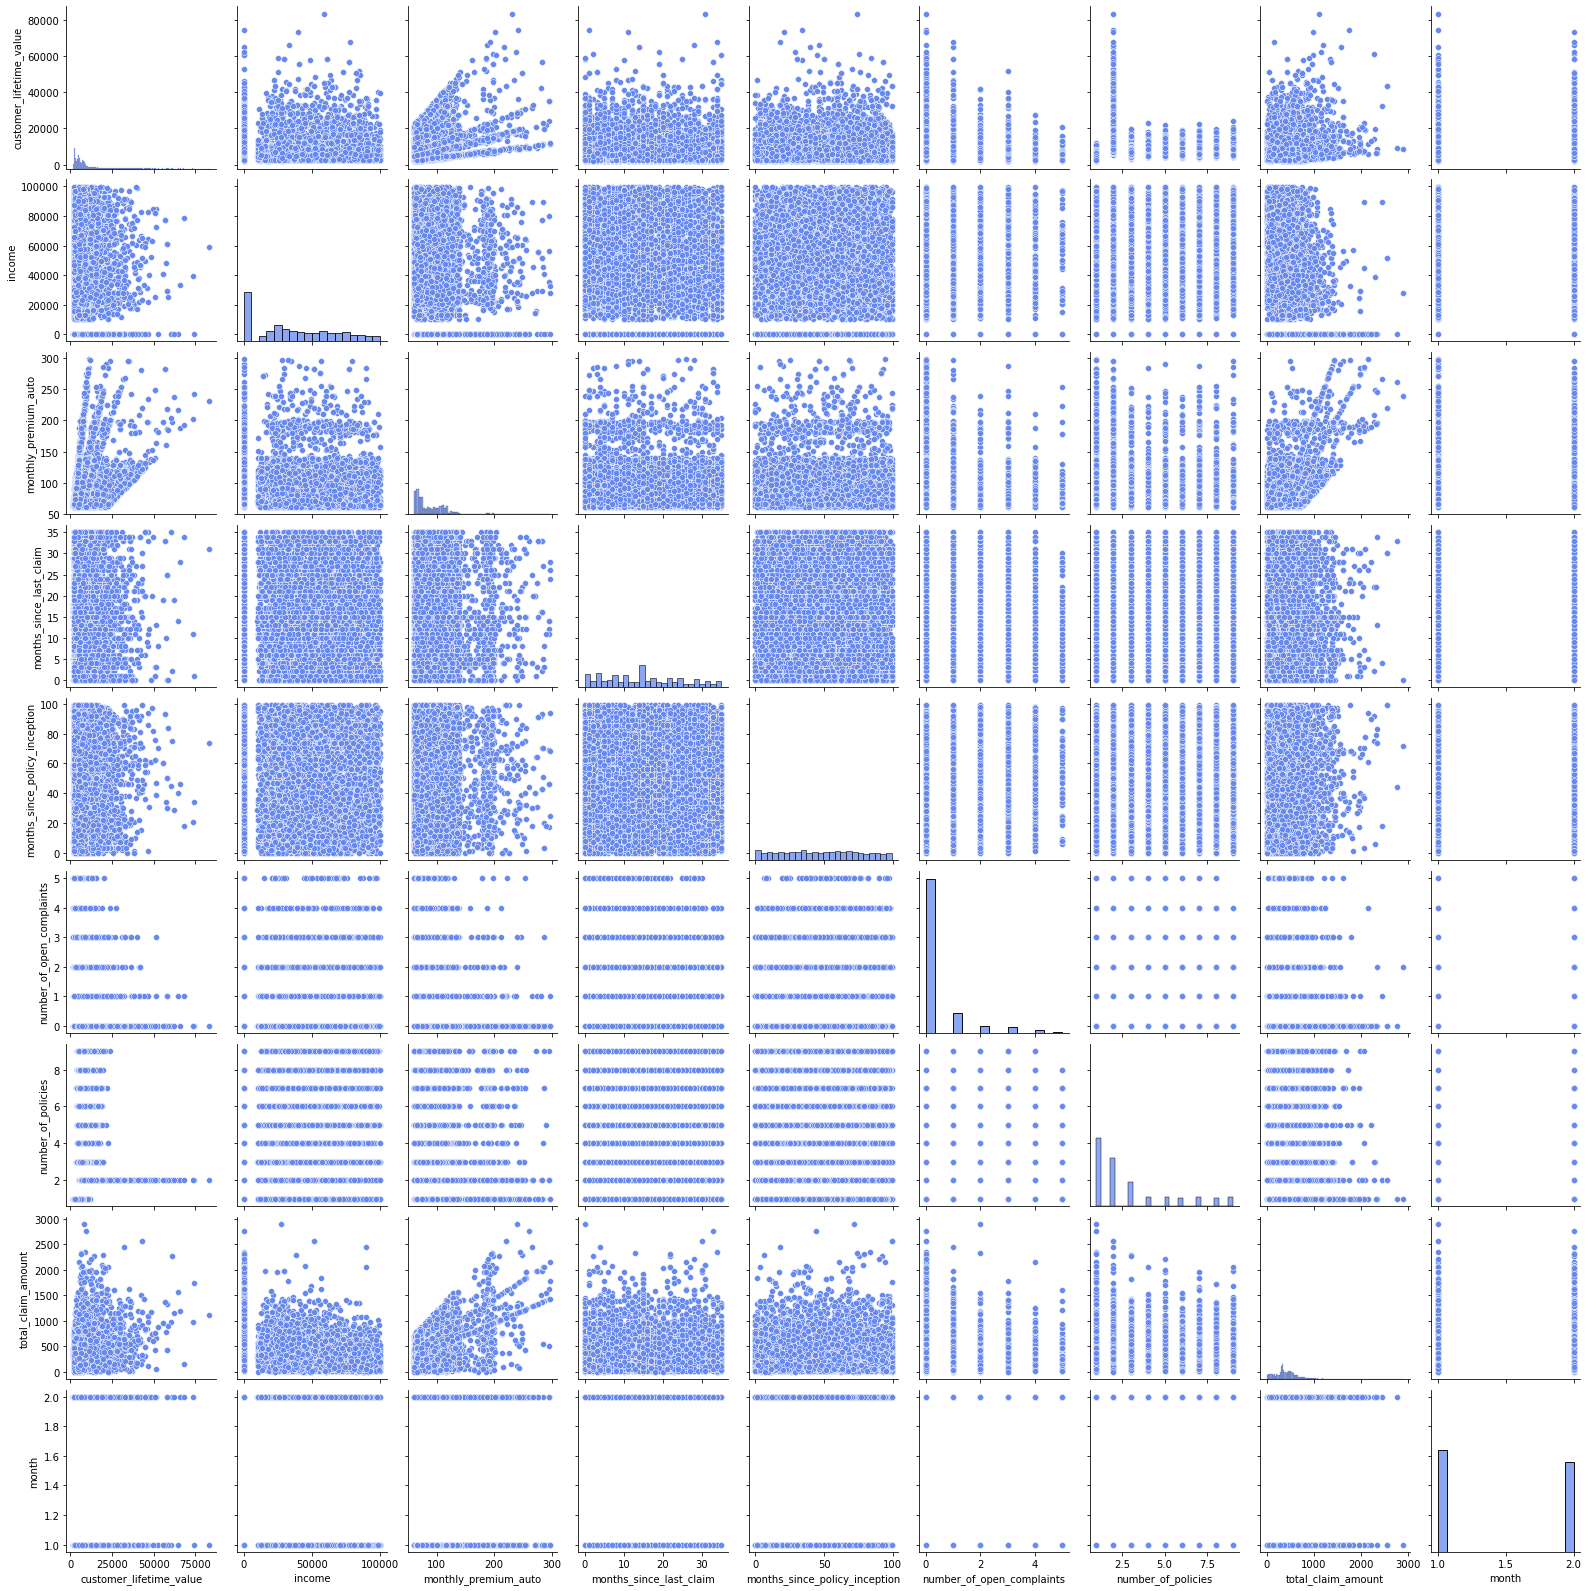

In [39]:
sns.pairplot(data=df_num)

## Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [36]:
df_num.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
customer_lifetime_value,1.000000,0.028306,0.403069,0.015708,0.016960,-0.030616,0.016024,0.232626,-0.009234
income,0.028306,1.000000,-0.009788,-0.023073,-0.005903,0.008425,-0.009960,-0.354141,-0.000443
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008502,0.018953,-0.010059,-0.020505,0.631799,0.007253
months_since_last_claim,0.015708,-0.023073,0.008502,1.000000,-0.038156,0.002594,0.007345,0.012678,-0.019400
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.038156,1.000000,0.004165,-0.009123,0.003095,0.015163
number_of_open_complaints,-0.030616,0.008425,-0.010059,0.002594,0.004165,1.000000,0.001681,-0.012380,-0.005802
number_of_policies,0.016024,-0.009960,-0.020505,0.007345,-0.009123,0.001681,1.000000,-0.008923,0.005127
total_claim_amount,0.232626,-0.354141,0.631799,0.012678,0.003095,-0.012380,-0.008923,1.000000,0.001425
month,-0.009234,-0.000443,0.007253,-0.019400,0.015163,-0.005802,0.005127,0.001425,1.000000


<AxesSubplot:>

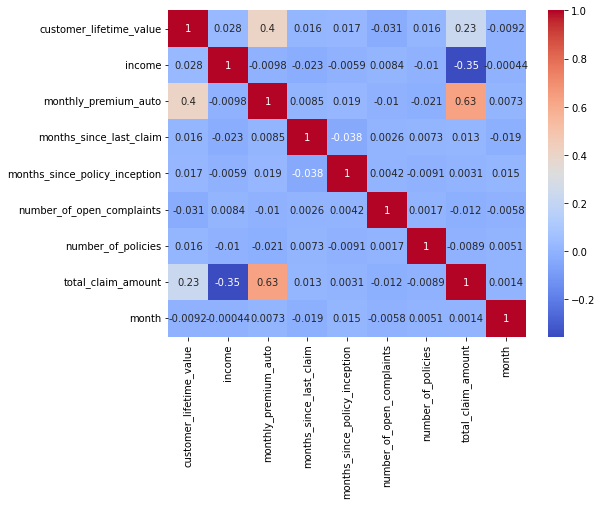

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')